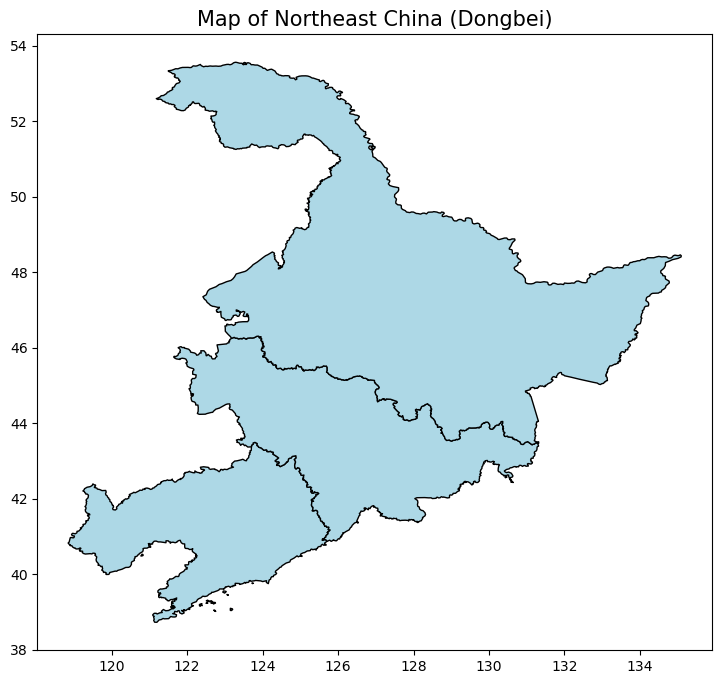

In [7]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape


url = 'https://geo.datav.aliyun.com/areas_v3/bound/100000_full.json'
response = requests.get(url)
geojson_data = response.json()


features = geojson_data['features']
geometries = [shape(feature['geometry']) for feature in features]
names = [feature['properties']['name'] for feature in features]
gdf = gpd.GeoDataFrame({'name': names, 'geometry': geometries})


dongbei = gdf[gdf['name'].isin(['辽宁省', '吉林省', '黑龙江省'])]


fig, ax = plt.subplots(figsize=(10, 8))


dongbei.plot(ax=ax, color='lightblue', edgecolor='black')


plt.title('Map of Northeast China (Dongbei)', fontsize=15)


plt.show()


C:\Users\huawei\AppData\Local\Temp\ipykernel_23752\2175738048.py:47: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(['Liaoning', 'Jilin', 'Heilongjiang'], loc='upper left')


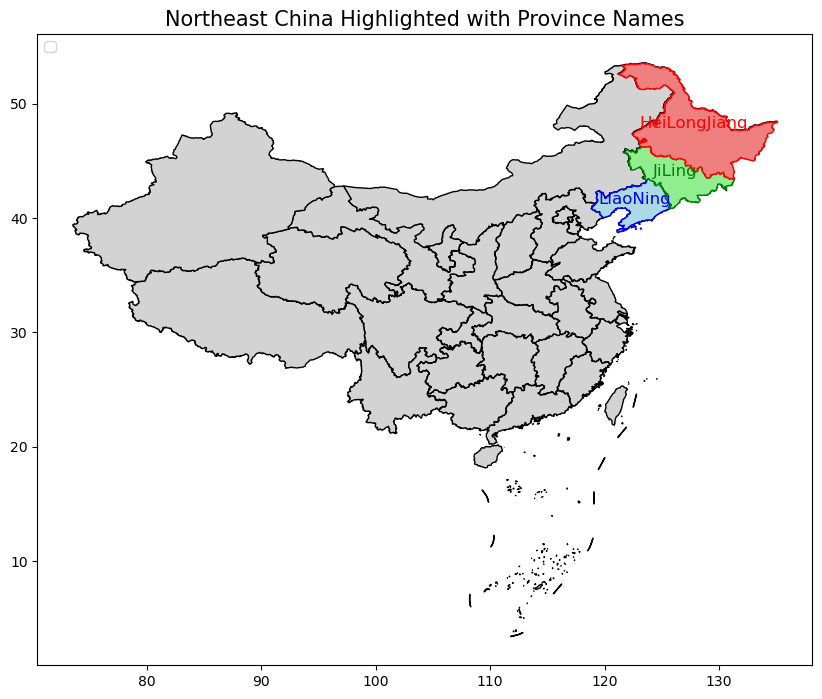

In [11]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape


url = 'https://geo.datav.aliyun.com/areas_v3/bound/100000_full.json'
response = requests.get(url)
geojson_data = response.json()


features = geojson_data['features']
geometries = [shape(feature['geometry']) for feature in features]
names = [feature['properties']['name'] for feature in features]
gdf = gpd.GeoDataFrame({'name': names, 'geometry': geometries})


china_map = gdf


liaoning = gdf[gdf['name'] == '辽宁省']
jilin = gdf[gdf['name'] == '吉林省']
heilongjiang = gdf[gdf['name'] == '黑龙江省']


fig, ax = plt.subplots(figsize=(10, 10))


china_map.plot(ax=ax, color='lightgray', edgecolor='black')


liaoning.plot(ax=ax, color='lightblue', edgecolor='blue', label='Liaoning')
jilin.plot(ax=ax, color='lightgreen', edgecolor='green', label='Jilin')
heilongjiang.plot(ax=ax, color='lightcoral', edgecolor='red', label='Heilongjiang')

liaoning_centroid = liaoning.geometry.centroid.iloc[0]
jilin_centroid = jilin.geometry.centroid.iloc[0]
heilongjiang_centroid = heilongjiang.geometry.centroid.iloc[0]


ax.text(liaoning_centroid.x, liaoning_centroid.y, 'LiaoNing', fontsize=12, ha='center', color='blue')
ax.text(jilin_centroid.x, jilin_centroid.y, 'JiLing', fontsize=12, ha='center', color='green')
ax.text(heilongjiang_centroid.x, heilongjiang_centroid.y, 'HeiLongJiang', fontsize=12, ha='center', color='red')


plt.legend(['Liaoning', 'Jilin', 'Heilongjiang'], loc='upper left')
plt.title('Northeast China Highlighted with Province Names', fontsize=15)

plt.show()
